**Image Filtering - Spatial Filtering**

Import required packages for image filtering.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

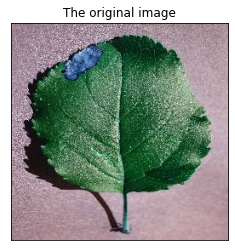

In [2]:
ref = cv2.imread('/content/2f6a52cd-21f5-41d0-870e-f8a67d1f5c56___JR_FrgE.S 2901.JPG')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

There are two key factors in applying a filter on an image in digital image processing; 1) the kernal type (and size), and 2) the padding method (padding is the extrapolation procedure which describes the kernel output over the borders of the image).

**Averaging filter**

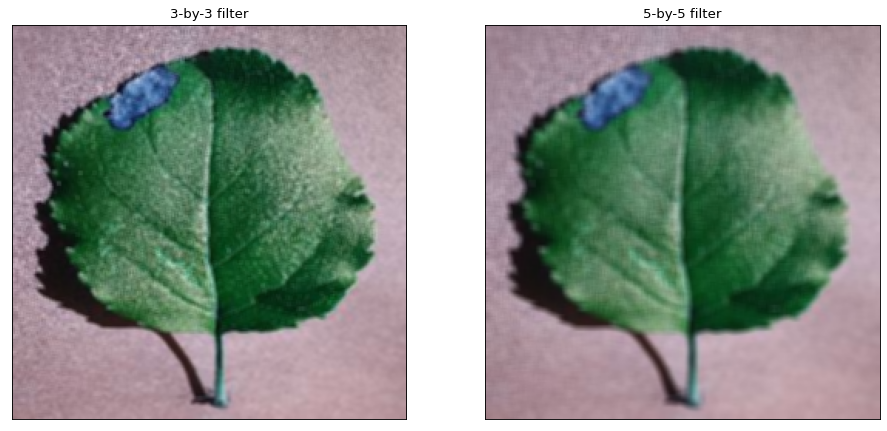

In [3]:
# Defining a kernel using numpy.
kernel_5 = np.ones((5,5),np.float32)/25
kernel_3 = np.ones((3,3),np.float32)/9

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
# compare two kernel sizes.
filtered_5 = cv2.filter2D(ref,-1,kernel_5)
filtered_3 = cv2.filter2D(ref,-1,kernel_3)

# plot the results in two subplots.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(121), plt.imshow(filtered_3), plt.title('3-by-3 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.subplot(122), plt.imshow(filtered_5), plt.title('5-by-5 filter')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

The complete command for performing 2D spatial filter over images in OpenCV is cv2.filter2D with the following list of parameters. Some of the parameters are not necessarily used.

src.depth() = CV_8U, ddepth = -1/CV_16S/CV_32F/CV_64F

src.depth() = CV_16U/CV_16S, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_32F, ddepth = -1/CV_32F/CV_64F

src.depth() = CV_64F, ddepth = -1/CV_64F

**kernel** – convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split() and process them individually.

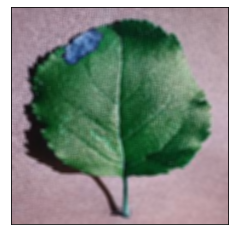

(<matplotlib.image.AxesImage at 0x7fee5bf894d0>,
 None,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 None)

In [4]:
# you can check the docs for further information.
blurred = cv2.blur(ref, (5, 5), -1)

plt.imshow(blurred), plt.grid(False), plt.xticks([]), plt.yticks([]), plt.show()

**Padding**


As we mentioned earlier, one of the key factors in applying a filter over an image is to understand how to extrapolate the border values of the image while some parts of the kernel are dropped outside of the image border. "borderType" is the parameter which handles this functionality of kernels. Normally, the function is not called directly. It is used inside FilterEngine and [copyMakeBorder()](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20copyMakeBorder(InputArray%20src,%20OutputArray%20dst,%20int%20top,%20int%20bottom,%20int%20left,%20int%20right,%20int%20borderType,%20const%20Scalar&%20value) to compute tables for quick extrapolation. It means that we should first create the bordered (padded) image and then apply the filter over that image instead of the original image.



To create a bordered image we use the following command and args. Using this command you can insert different border sizes on each side of the image.

cv2.copyMakeBorder(src, top, bottom, left, right, borderType[, dst[, value]])
**bold text**
**src – Source image**.

**Size(src.cols+left+right, src.rows+top+bottom)**

top, bottom, left, right – Parameter specifying how many pixels in each direction from the source image rectangle to extrapolate. For example, top=1, bottom=1, left=1, right=1 mean that 1 pixel-wide border needs to be built.

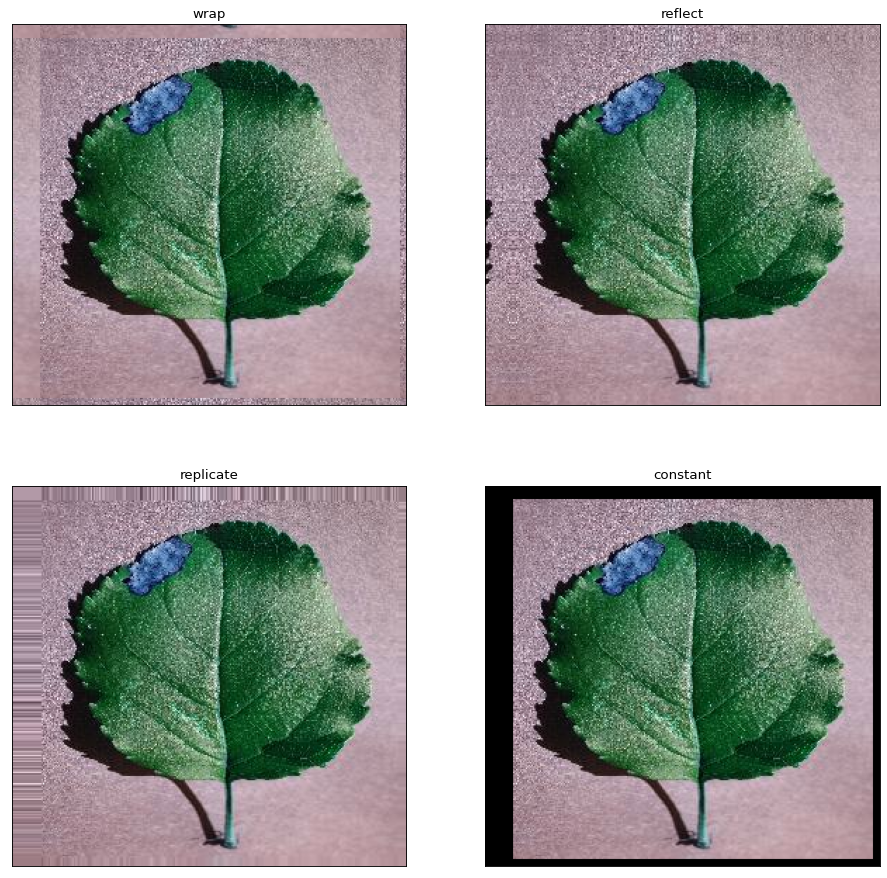

In [5]:
top = 10; bottom = 5; left = 20; right = 5
const = 100
img2 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(ref, top, bottom, left, right, 
                          cv2.BORDER_CONSTANT, const)

# Display the images
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(221), plt.imshow(img2), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('wrap')

plt.subplot(222), plt.imshow(img3), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('reflect')

plt.subplot(223), plt.imshow(img4), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('replicate')

plt.subplot(224), plt.imshow(img5), plt.grid(False)
plt.xticks([]), plt.yticks([]), plt.title('constant')

plt.show()

**User-defined kernels**

One can apply user-defined kernels just like the way we applied in section 1. For example, consider applying the following kernel (which is a vertical gradient filter) on the image.

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

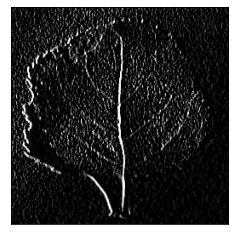

In [6]:
# vertical gradient kernel
# define a random kernel
vertical_gd = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

# apply it.
filter_v = cv2.filter2D(ref[:, :, 2], -1, vertical_gd)

# show in a different colormap.
plt.imshow(filter_v, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

**Median filtering**

Median filter is a non-linear filter which is very useful in removing or decreasing the salt-and-pepper noise. The medianBlur function in OpenCV is designed to perform median filtering.

**cv2.medianBlur(src, ksize[, dst])**
**bold text**
**bold text**src **bold text** – input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.

**ksize** – aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...

In order to better understand the effect of median filtering, we first add some noise to the image.

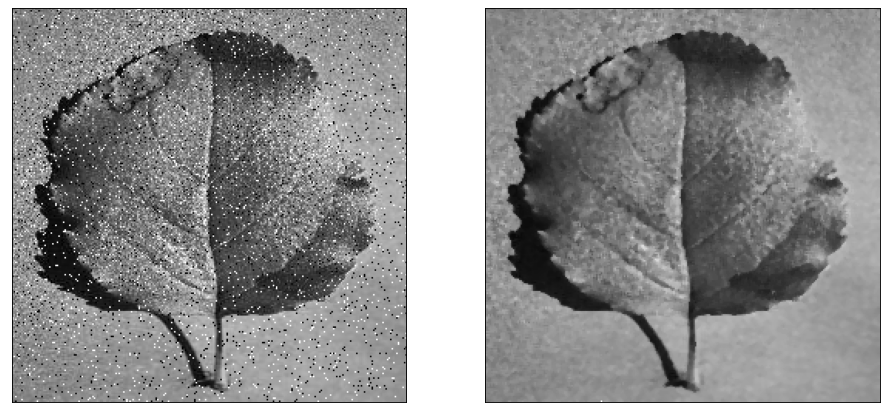

In [7]:
s_and_p = np.random.rand(ref.shape[0], ref.shape[1])

# if we consider 5% salt and pepper noise, we'd like to have
# 2.5% salt and 2.5% pepper. thus:
salt = s_and_p > .975
pepper = s_and_p < .025

# in order to add some noise, we should turn off black (pepper) locations and
# turn on white (white) locations.
channel_2 = np.atleast_1d(ref[:, :, 1])
noisy = np.zeros_like(channel_2)

for i in range(channel_2.shape[0]*channel_2.shape[1]):
  if salt.ravel()[i] == 1:
    noisy.ravel()[i] = 255
  elif pepper.ravel()[i] == 1:
    noisy.ravel()[i] = 0
  else:
    noisy.ravel()[i] = channel_2.ravel()[i]

# apply median filter with size 3
Med = cv2.medianBlur(noisy, 3)

# Display the results
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(noisy, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([])
plt.imshow(Med, cmap='gray'), plt.grid(False)
plt.show()

**Gaussian filtering**

There are multiple ways to perform a gaussian filtering over an image:

using cv2.GaussianBlur() function,
and, using cv2.sepFilter2D() after creating two separate horizontal and vertical kernels and applying them.
But, first of all, we need to have a noisy image; specifically with gaussian noise added to it. To create such an image we use Numpy to create random gaussian noise and then add it to the image.

(<matplotlib.image.AxesImage at 0x7fee5bda7a50>, None)

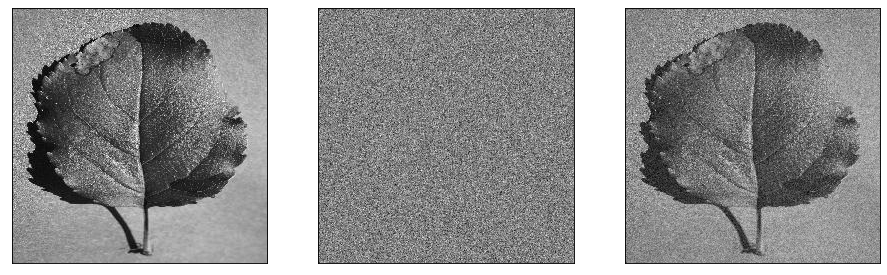

In [8]:
# Creating random normal (gaussian) noise with pre-defined mean and std.
# The noisy image should be the size of the reference image.
mean = 0
sigma = 20.0
gauss_noise = np.random.normal(mean, sigma, (ref.shape[0], ref.shape[1]))

# Convert RGB image to Grayscale image using cvtColor()
gray = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)

# Add gaussian noise to the image
g_noisy = gray + gauss_noise # Gaussian noisy image

# Showing gray image, noise image, and noisy image
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(131), plt.xticks([]), plt.yticks([])
plt.imshow(gray, cmap='gray'), plt.grid(False)
plt.subplot(132), plt.xticks([]), plt.yticks([])
plt.imshow(gauss_noise, cmap='gray'), plt.grid(False)
plt.subplot(133), plt.xticks([]), plt.yticks([])
plt.imshow(g_noisy, cmap='gray'), plt.grid(False)

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

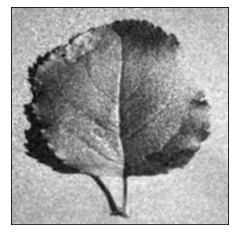

In [9]:
g_filtered = cv2.GaussianBlur(g_noisy, (3, 3), 20, 20)

# Display the result
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

[[0.33319442]
 [0.33361117]
 [0.33319442]]


(<matplotlib.image.AxesImage at 0x7fee5bce6f50>, None)

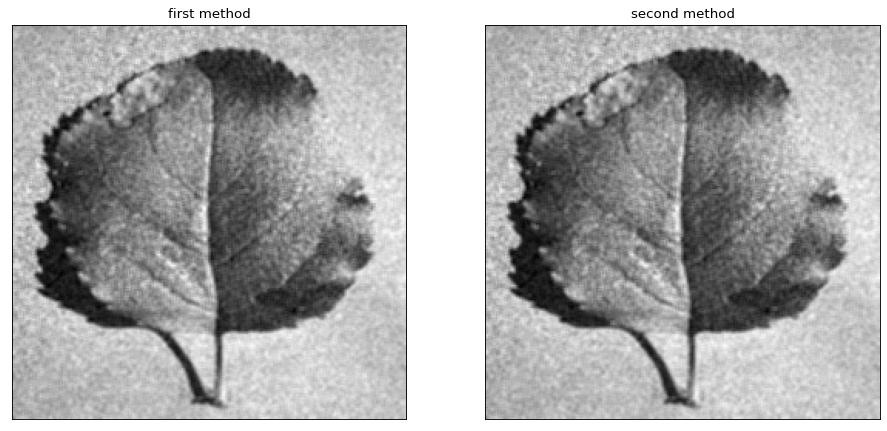

In [10]:
# Create a single gaussian kernel
g_kernel = cv2.getGaussianKernel(3, 20)
print(g_kernel)

# Apply two separate kernels over the image.
g_filtered_2 = cv2.sepFilter2D(g_noisy, -1, g_kernel, g_kernel)

# Displaying the results.
fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(121), plt.xticks([]), plt.yticks([]), plt.title('first method')
plt.imshow(g_filtered, cmap='gray'), plt.grid(False)
plt.subplot(122), plt.xticks([]), plt.yticks([]), plt.title('second method')
plt.imshow(g_filtered_2, cmap='gray'), plt.grid(False)

Convolution and Padding described in this image
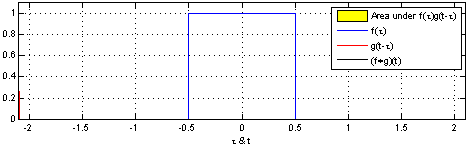

